# ANALYZING TRENDS IN THE NEW YORK REAL ESTATE MARKET
Ethan Ewing, Rebecca Shamus, Ani Bhaskara
Fall 2022

**MOTIVATION**

We will be taking a look at trends in the New York city housing market over time. This includes data about the location, building classification net income, efficency, and market value of different properties in different areas of the city. The housing market has bee quite unpredictable and our group wanted to take a closer look at trends in this data and how the data is predicted to change.

We found a csv file with information about condominiums in NYC with reports from the years 2012 to 2019. This includes data about the location, building classification net income, efficency, and market value of different properties in different areas of the city.

We examined income efficency of these properties. We ran linear regression to predict future performance of these properties. We took a look at when the condos were built. We analyzed graphs that displayed the trends of when the condos were built and used historical contexts to try explain the trends we saw. Then, we used the GeoPy library to fetch the longitude and latitude for the address provided for each condo. We used these coordinates and the folium library to make a map that displayed where different condos were being built. We also wanted to see if there was a dependency between the classification of the condominiums and the borough that they resided in. We used a Chi-Square Test to test the hypothesis that the condos' classification was independent of its borough.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Collecting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

Here, we loaded in our data set using pandas and sorted it by year and Estimated Gross income.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cmsc320final/Condominium_Comparable_Rental_Income_in_NYC.csv')

df = df.sort_values(by='Estimated Gross Income', ascending=False)
df = df[:1000]
df = df.sort_values(by='Report Year', ascending=True)

df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019


We decided to first analyze the efficiency of each rental property. This will tell us the expenses/revenue as a percentage. The percentage indicates how much is spent for every dollar. For example an efficiency of .75 indicates that 75 cents is spent for every dollar grossed. Lower efficiencies indicate that a property generates a poorer return for the owner, which is why we find this indicator important. For example, if we found a trend of low efficiency in a particular neighborhood over time, we could assume that the housing market was doing poorly in that location.

Since revenue is already calculated as Net Operating Income, we used it to calculate the efficiency. We iterated through the dataset again to divide the Estimated Expense column by our Net Operating Income Column, and then added this new column to the dataset.


# Plotting Data

In [4]:
eff = []
for i, rows in df.iterrows():
  eff.append(rows['Estimated Expense'] / rows['Net Operating Income'])

df['Efficiency'] = eff
df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Efficiency
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012,0.350767
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012,0.360613
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012,0.396666
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012,0.555874
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012,0.356205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019,0.612719
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019,0.417755
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019,1.297546
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019,0.492565


Next we wanted to look at the best neighborhoods for rental properties over time, based on efficiency. We first created a scatter plot with seaborn lmplot that demonstrated the efficiency over time by neighborhood. Next, we created a scatter plot with a regression line, using regplot, for each neighborhood with over 15 data points. Since the data is already sorted by Net Operating Income, this gave us the top neighborhoods with the highest Net Operating Income.

The results of each graph told us that each neighborhood saw an upward trend in efficiency, besides Clinton. The Financial District proved to have the highest efficiency. Which indicates that the Financial district may be the most desirable location for investing in real estate.

In [5]:
neighborhood = []
for i in df['Neighborhood'].unique():
  if len(df[df.Neighborhood == i]) > 15:
    neighborhood.append(i)

<function matplotlib.pyplot.show(*args, **kw)>

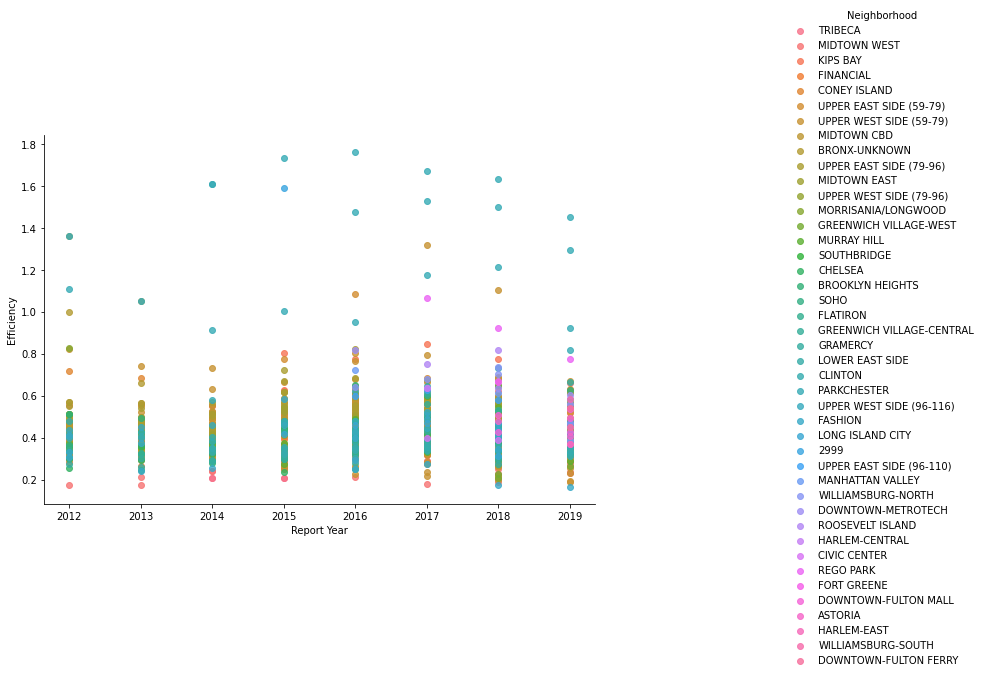

In [6]:
sns.lmplot(data=df, x = 'Report Year', y = 'Efficiency', hue = 'Neighborhood', fit_reg=False) 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 6)
plt.show

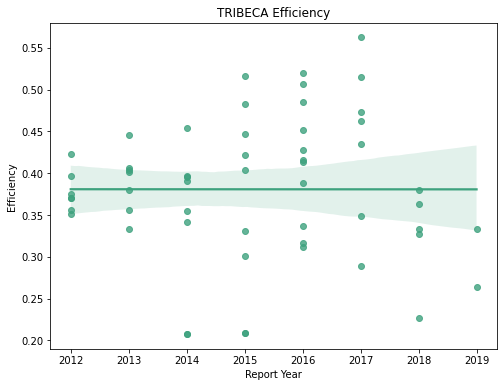

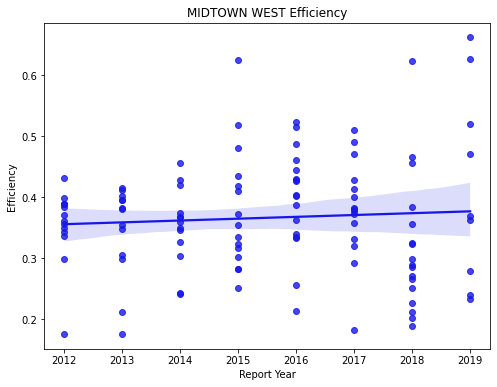

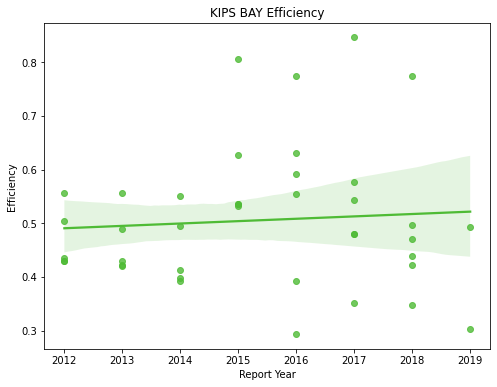

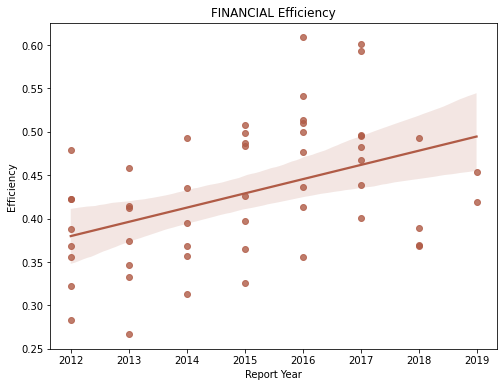

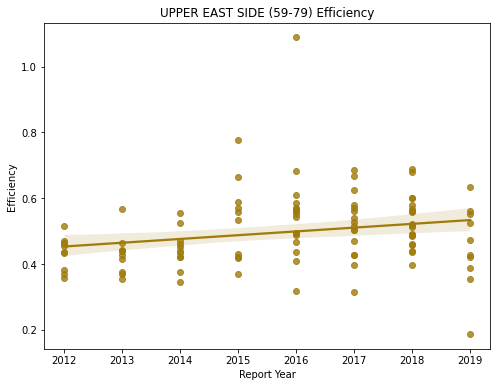

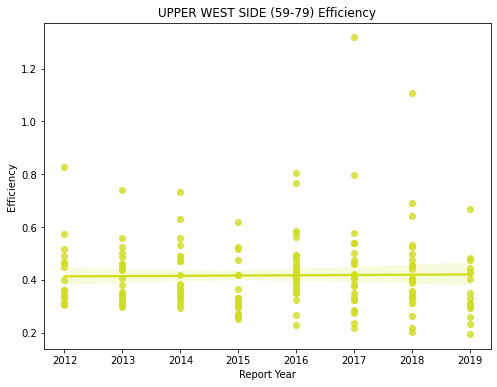

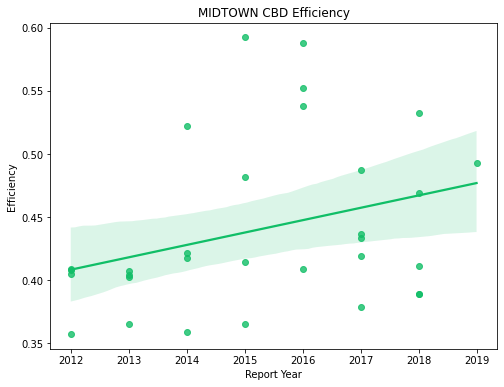

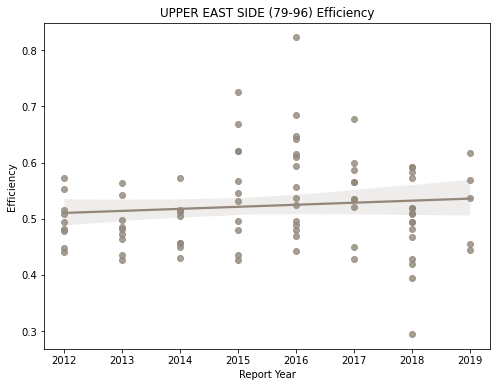

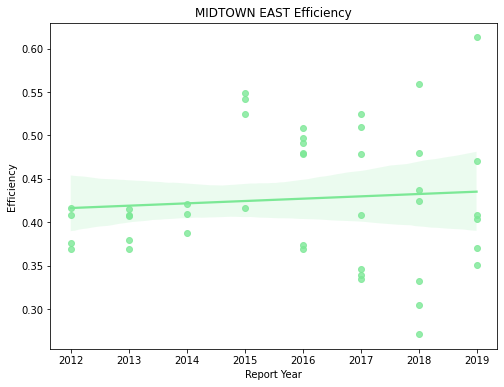

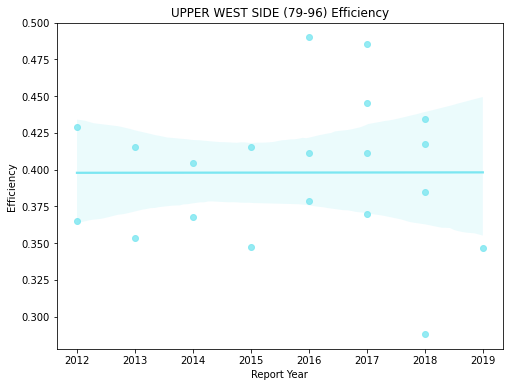

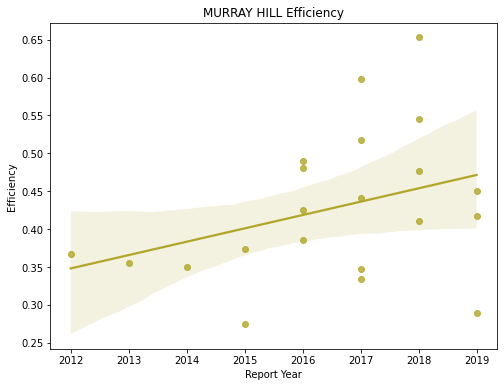

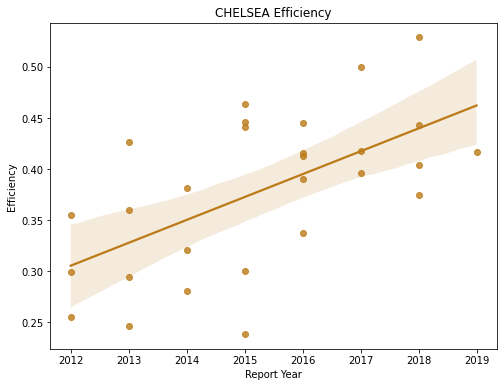

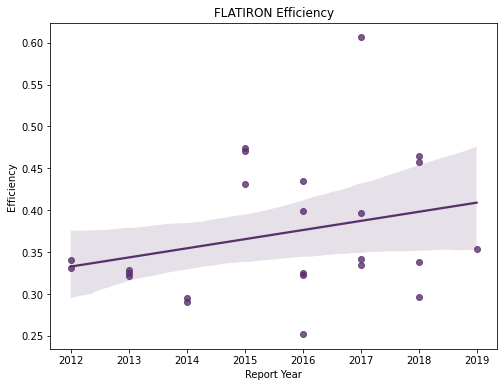

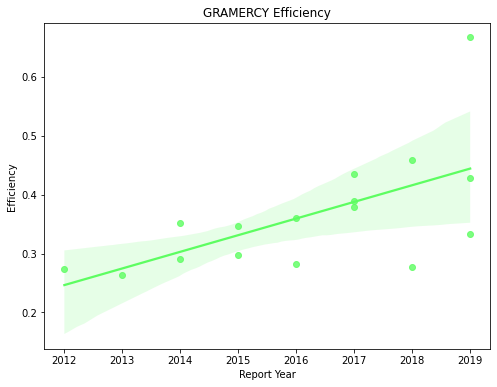

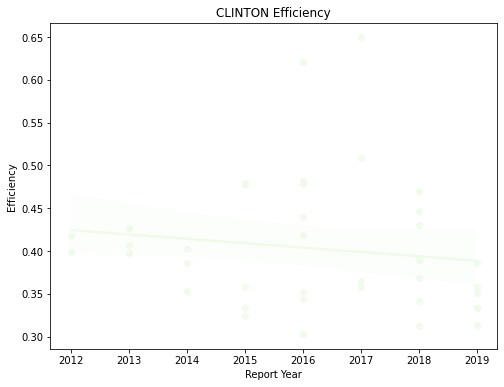

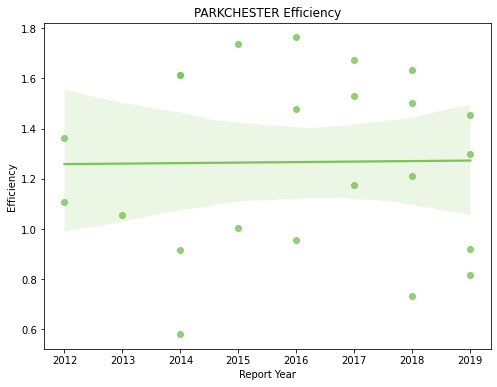

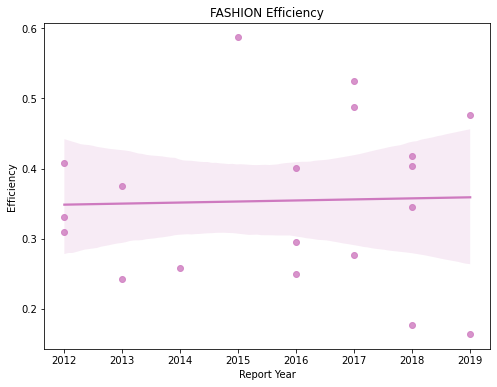

In [7]:
for i in neighborhood:
  n = df.loc[df['Neighborhood'] == i]
  plt.figure(figsize = (8, 6))
  sns.regplot(data=n, x = 'Report Year', y = 'Efficiency', color = np.random.rand(3,)) 
  plt.title(i + " Efficiency")

What’s considered good efficiency, net operating income, and full market value? To determine the best real estate investments, we wanted to take a look at the mean values for these categories in respect to time.
We created a new dataframe and used the .mean() function to find the averages of these factors. We then used the seaborn barplot to plot each average per year into three different graphs

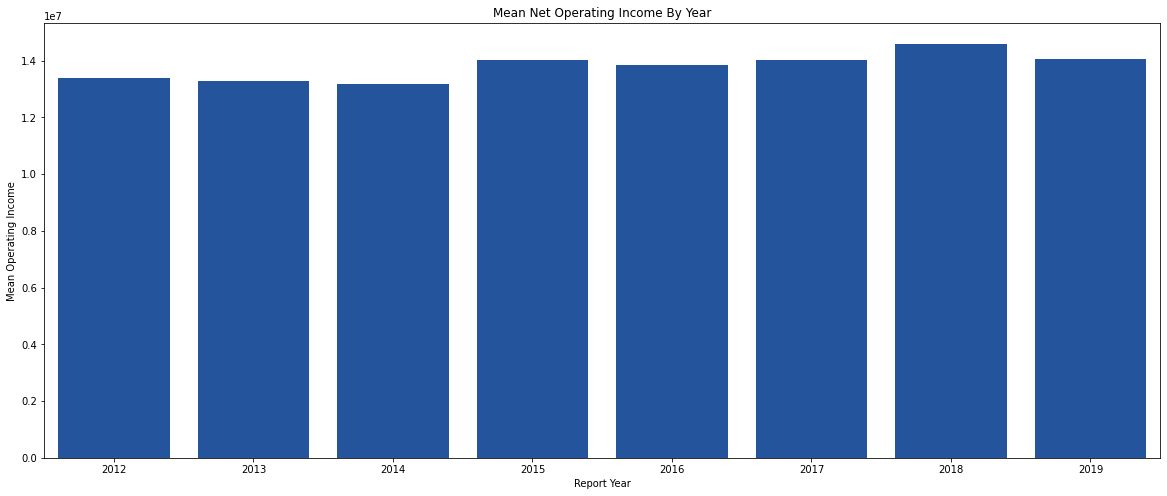

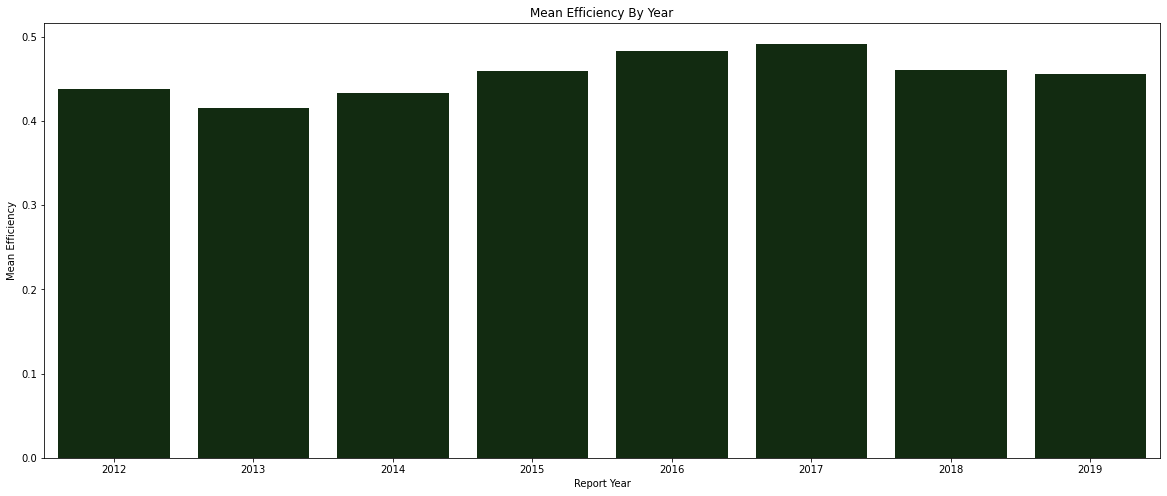

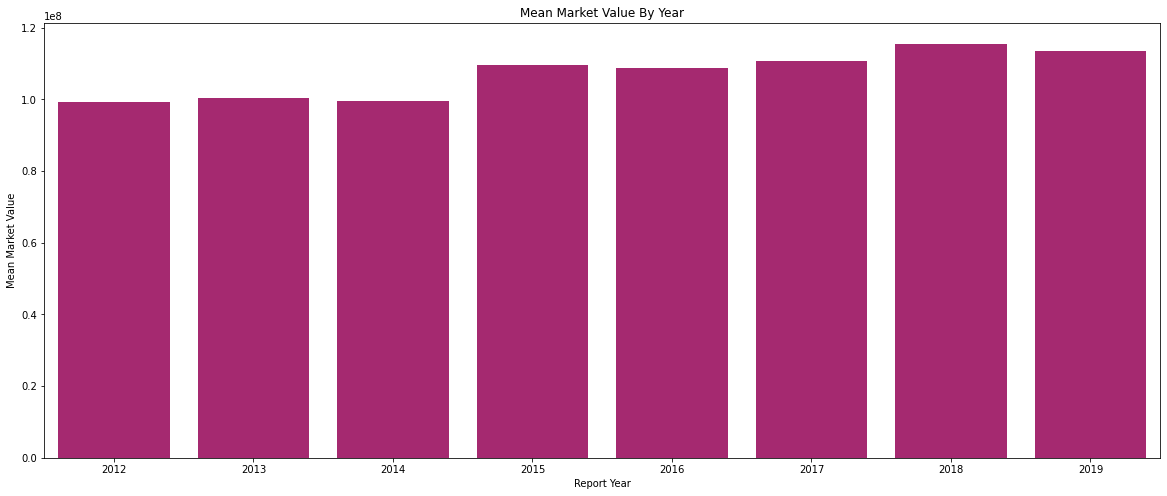

In [8]:
means = pd.DataFrame()
rep_year = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in range(0,8):
    rep_year.append(i + 2012)
    avg_net_income.append(df.loc[df['Report Year'] == (i + 2012), 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Report Year'] == (i + 2012), 'Efficiency'].mean())
    avg_market_val.append(df.loc[df['Report Year'] == (i + 2012), 'Full Market Value'].mean())



means['Report Year'] = rep_year
means['Mean Operating Income'] = avg_net_income
means['Mean Efficiency'] = avg_efficency
means['Mean Market Value'] = avg_market_val

sns.barplot(x='Report Year', y='Mean Operating Income', data=means, color = np.random.rand(3,))
plt.title("Mean Net Operating Income By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

plt.title("Mean Efficiency By Year")
sns.barplot(x='Report Year', y='Mean Efficiency', data=means, color = np.random.rand(3,))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

sns.barplot(x='Report Year', y='Mean Market Value', data=means, color = np.random.rand(3,))
plt.title("Mean Market Value By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

We also wanted to take a look at how properties were distributed around the mean. To do this we created a metric for properties, given that the mean was about .45 for efficiency, we created a new column called rank. Each property would be given a value of 0, 1, or 2 based on how they fell around the mean. Properties with low efficiency were given a score of 0, median efficiencies were given a score of 1, and high efficiencies were given a score of 2. We then created a count plot with seaborn, that demonstrated to us that most properties had a low efficiency.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Outcome')

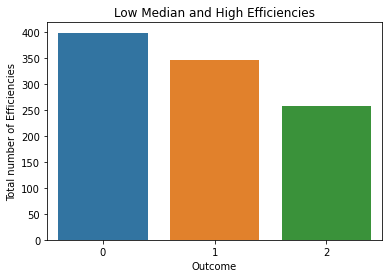

In [9]:
rank = []
for i, rows in df.iterrows():
  if rows['Efficiency'] < 0.4:
    rank.append(0)
  elif rows['Efficiency'] > 0.5:
    rank.append(2)
  else:
    rank.append(1)

df['rank'] = rank

sns.countplot(rank)
plt.title("Low Median and High Efficiencies")
plt.ylabel("Total number of Efficiencies")
plt.xlabel("Outcome")

Here we wanted to break down these three factors again by neighborhood, rather than time, we replicated the process above and created three more bar graphs. We can see that neighborhoods such as Panchester performed well in all three bargraphs, which indicated that it may be a good investment.

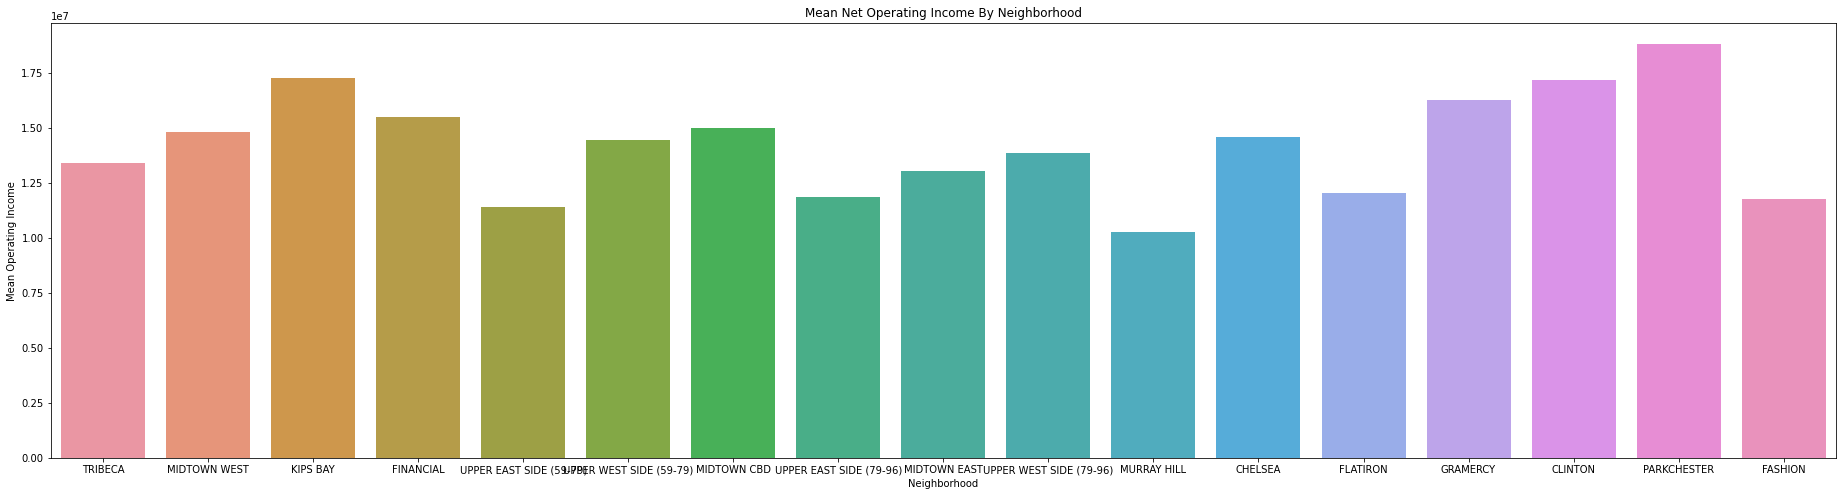

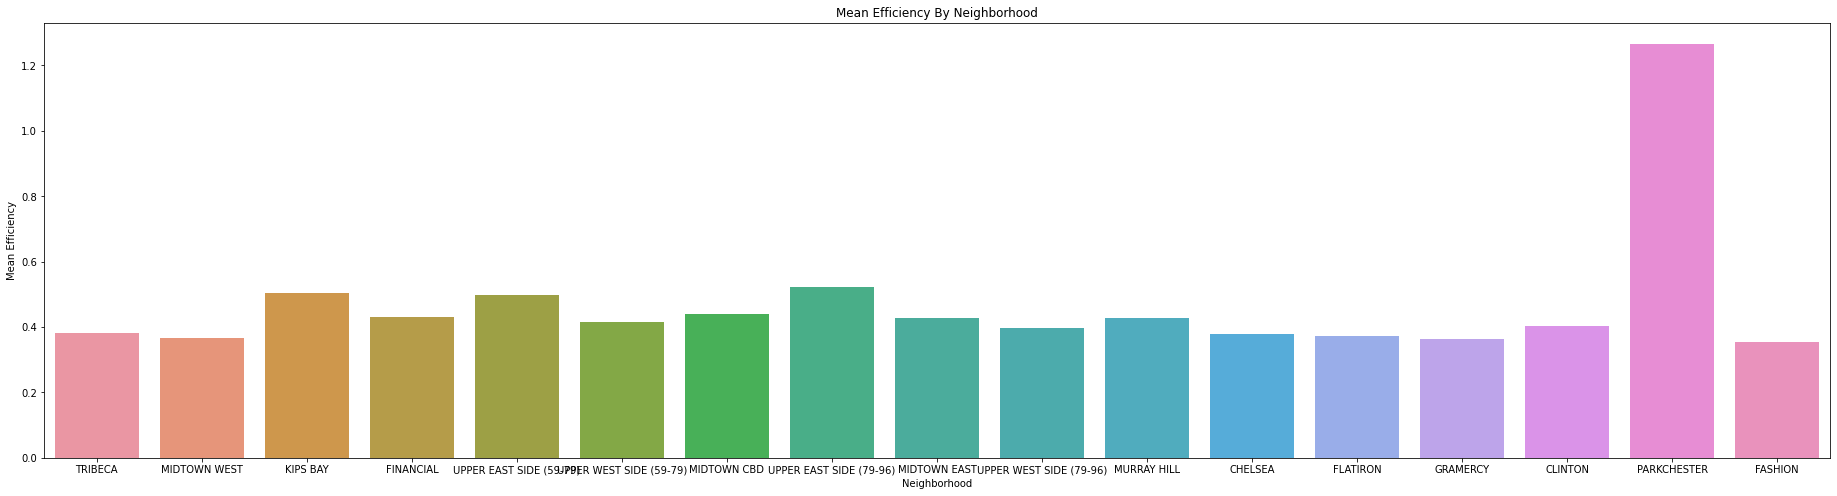

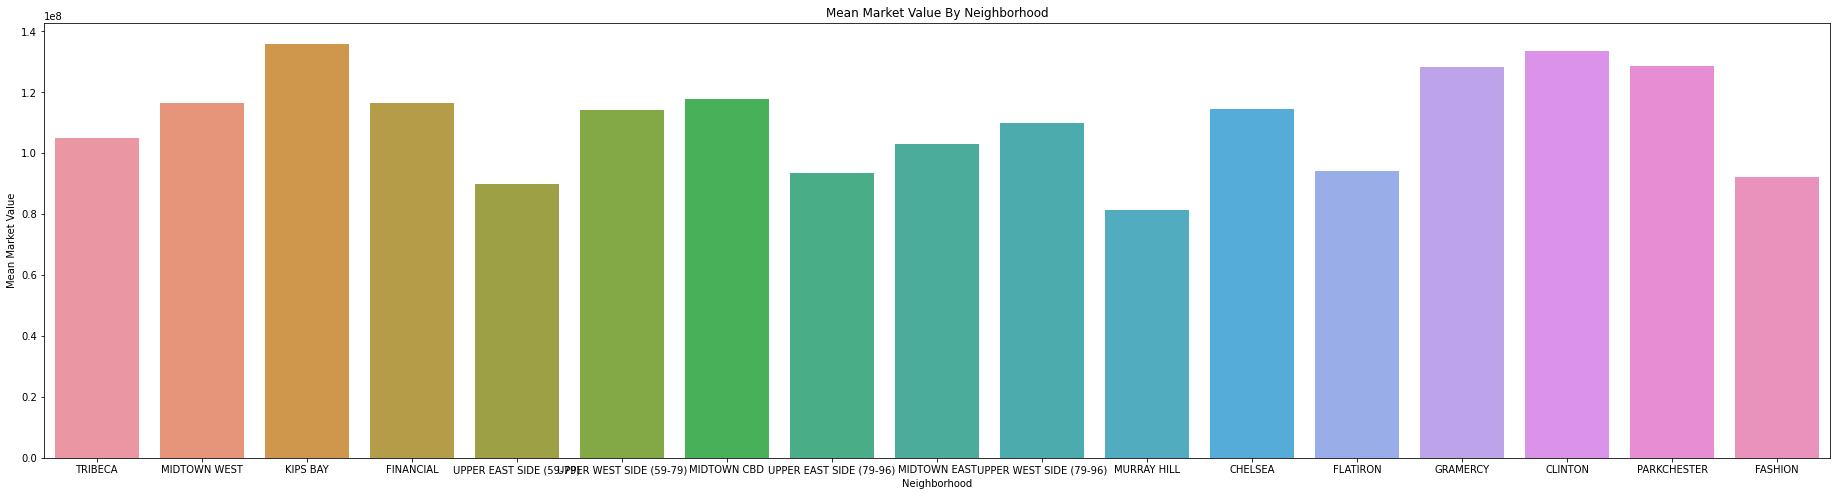

In [10]:
nmeans = pd.DataFrame()
n = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in neighborhood:
    n.append(i)
    avg_net_income.append(df.loc[df['Neighborhood'] == i, 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Neighborhood'] == i, 'Efficiency'].mean())
    avg_market_val.append(df.loc[df['Neighborhood'] == i, 'Full Market Value'].mean())

nmeans['Neighborhood'] = n
nmeans['Mean Operating Income'] = avg_net_income
nmeans['Mean Efficiency'] = avg_efficency
nmeans['Mean Market Value'] = avg_market_val

sns.barplot(x='Neighborhood', y='Mean Operating Income', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Net Operating Income By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Efficiency', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Efficiency By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Market Value', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Market Value By Neighborhood")
plt.show()


Finally, we wanted to see how the data correlated to each other, we passed in df.corr() into a seaborn heatmap, which demonstrated to us the correlation of the integer and float values of the dataset. We were surprised to see that net operating income and report year had a very poor correlation, of about 0.1. We guessed that net operating income increased each year but that would show a high correlation. We see now that the two factors are independent of each other. We were also surprised that the year a property was built had little to no correlation to any of the factors including estimated expense and estimated gross income. Categories with high positive correlation included estimated expense, estimated income, and gross square feet. This makes sense as property values change based on these factors.

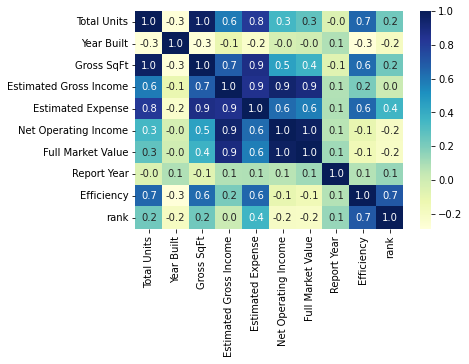

In [11]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
sns.set(rc={'figure.figsize':(10,10)})

# Linear Regression

 The next step in our process was linear regression. The purpose of using linear regression in our project was to predict how the housing market may perform in the future based on different factors, such as efficiency and net operating income. To create our first model, we used numpy to create and reshape arrays from our dataframe columns about the report year and net operating income, to create a prediction of net operating income over time. We then dropped NaN (null) values, are they are unusable, and performed the train_test_split from sklearn. To perform linear regression we chose to import this package, along with the Linear Regression one. We proceeded to fit the test and predict and use the Linear Regression package to predict outcomes. To display these outcomes, we plotted our actual data using a scatter plot, then used a linear regression line to plot the predicted linear regression line.


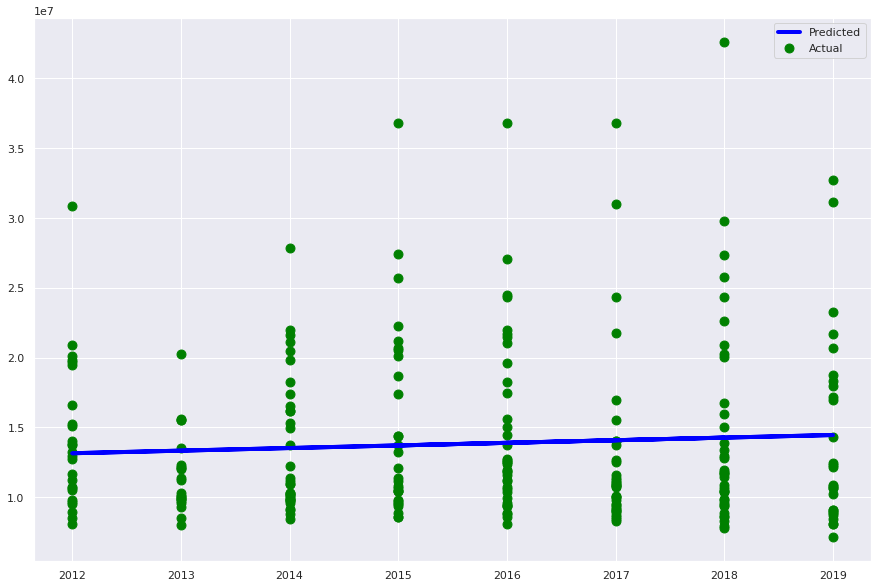

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = np.array(df['Report Year']).reshape(-1, 1)
y = np.array(df['Net Operating Income']).reshape(-1, 1)

df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

r = LinearRegression().fit(X_train, y_train)

y_pred = r.predict(X_test)

f, ax = plt.subplots(figsize=(13,10))

plt.scatter(X_test, y_test, color = "green", label = "Actual", s=80)
plt.plot(X_test, y_pred, color = "blue", label = "Predicted", linewidth=4)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

ax.legend()
plt.show()


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df2 = pd.DataFrame()
df2['year'] = df['Report Year']
df2['income'] = df['Net Operating Income']
df2['area'] = df['Neighborhood']

results = smf.ols(formula='income ~ year * area', data=df2).fit()

results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.948
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.14e-14
Time:                        03:04:22   Log-Likelihood:                -16840.
No. Observations:                 998   AIC:                         3.384e+04
Df Residuals:                     918   BIC:                         3.423e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -9.478e+08   1.07e+09     -0.887      0.375   -3.04e+09    1.15e+09
area[T.ASTORIA]                          8.79e+08    1.5e+10      0.059      0.953   -2.85e+10    3.02e+10
area[T.BRONX-UNKNOWN]                  -4.451e+09   1.06e+10     -0.421      0.674   -2.52e+10    1.63e+10
area[T.BROOKLYN HEIGHTS]               -5.477e+08    2.2e+09     -0.249      0.803   -4.86e+09    3.77e+09
area[T.CHELSEA]                         1.273e+09   1.46e+09      0.874      0.382   -1.59e+09    4.13e+09
area[T.CIVIC CENTER]                   -1.183e+09    1.5e+10     -0.079      0.937   -3.05e+10    2.82e+10
area[T.CLINTON]                        -2.174e+09   1.35e+09     -1.611      0.108   -4.82e+09    4.74e+08
area[T.CONEY ISLAND]                    1.787e+09   1.49e+10      0.120      0.905   -2.75e+10    3.11e+10
area[T.DOWNTOWN-FULTON FERRY]             -0.0898      1.771     -0.051      0.960      -3.565       3.385
area[T.DOWNTOWN-FULTON MALL]            -3.62e+09   1.06e+10     -0.341      0.733   -2.44e+10    1.72e+10
area[T.DOWNTOWN-METROTECH]             -4.422e+08   4.44e+09     -0.100      0.921   -9.15e+09    8.27e+09
area[T.FASHION]                         1.699e+08   1.48e+09      0.115      0.908   -2.73e+09    3.07e+09
area[T.FINANCIAL]                      -1.047e+09    1.3e+09     -0.807      0.420   -3.59e+09     1.5e+09
area[T.FLATIRON]                       -7.413e+07   1.52e+09     -0.049      0.961   -3.05e+09     2.9e+09
area[T.FORT GREENE]                     3.265e+09    1.3e+10      0.252      0.801   -2.22e+10    2.87e+10
area[T.GRAMERCY]                        1.582e+09   1.64e+09      0.968      0.333   -1.63e+09    4.79e+09
area[T.GREENWICH VILLAGE-CENTRAL]       1.373e+09   1.85e+09      0.743      0.457   -2.25e+09       5e+09
area[T.GREENWICH VILLAGE-WEST]         -4.057e+09    1.8e+09     -2.254      0.024   -7.59e+09   -5.24e+08
area[T.HARLEM-CENTRAL]                 -1.925e+08    1.5e+10     -0.013      0.990   -2.95e+10    2.92e+10
area[T.HARLEM-EAST]                       -0.7072      2.003     -0.353      0.724      -4.638       3.223
area[T.KIPS BAY]                        7.893e+08   1.32e+09      0.596      0.551   -1.81e+09    3.39e+09
area[T.LONG ISLAND CITY]                 2.53e+09   2.73e+09      0.926      0.355   -2.83e+09    7.89e+09
area[T.LOWER EAST SIDE]                -6.554e+09   2.43e+09     -2.692      0.007   -1.13e+10   -1.78e+09
area[T.MANHATTAN VALLEY]                 4.98e+08   7.53e+09      0.066      0.947   -1.43e+10    1.53e+10
area[T.MIDTOWN CBD]                    -5.335e+08   1.39e+09     -0.383      0.702   -3.27e+09     2.2e+09
area[T.MIDTOWN EAST]                    1.893e+09   1.29e+09      1.469      0.142   -6

# Hypothesis Test

For our hypothesis test, we are using a One Way F-test. We chose this type of hypothesis test because we want to know if our neighborhoods share similar efficenies. In the execution of our hypthesis test, each neighborhood is a group and their mean efficency is the metric we are using to test their similarity. 
To create the hypothesis, we used the one hot encoding technique to create three columns. Each column contains a value of true or false based on the efficency. The median value 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

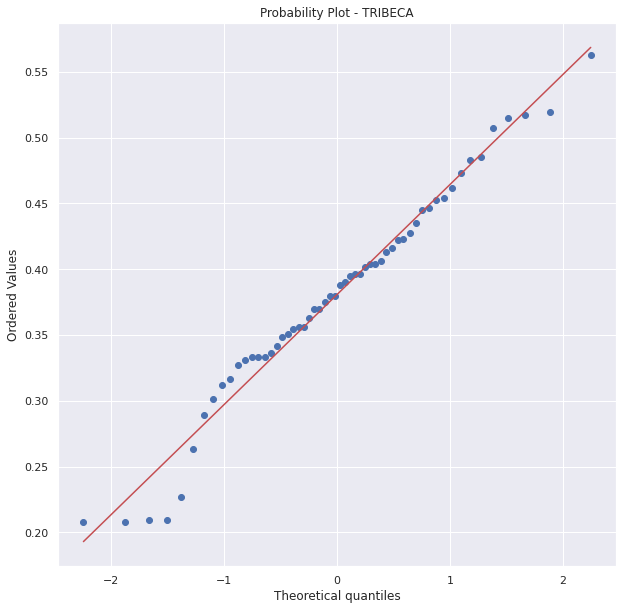

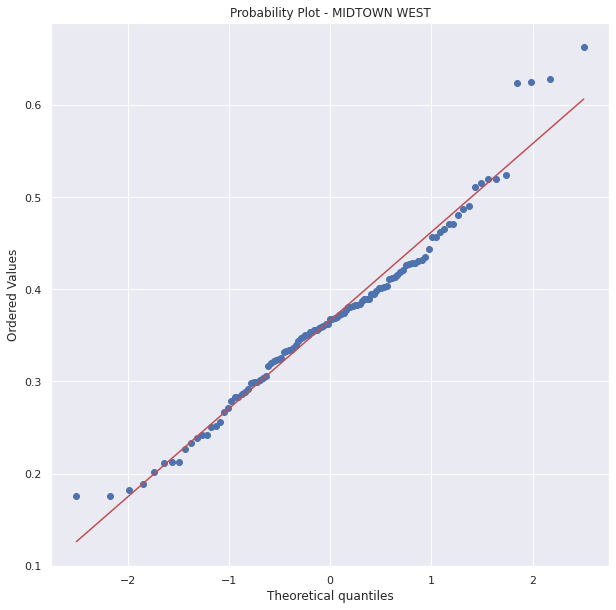

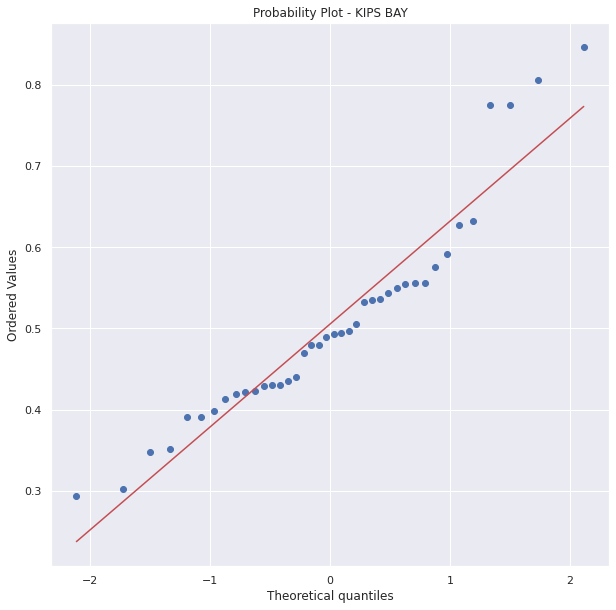

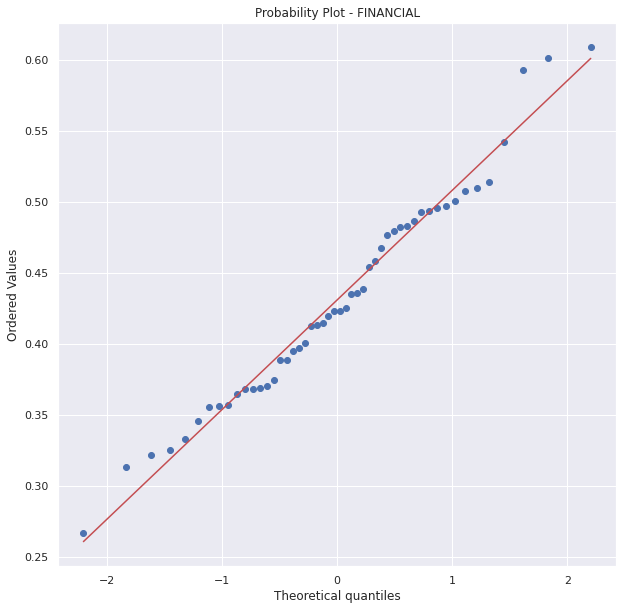

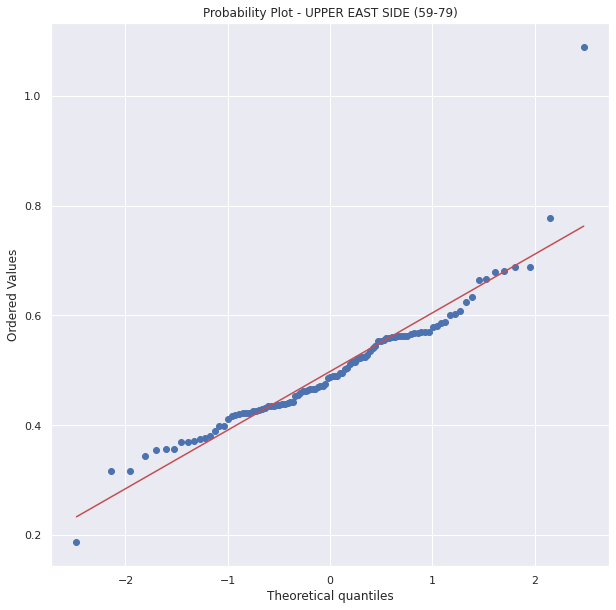

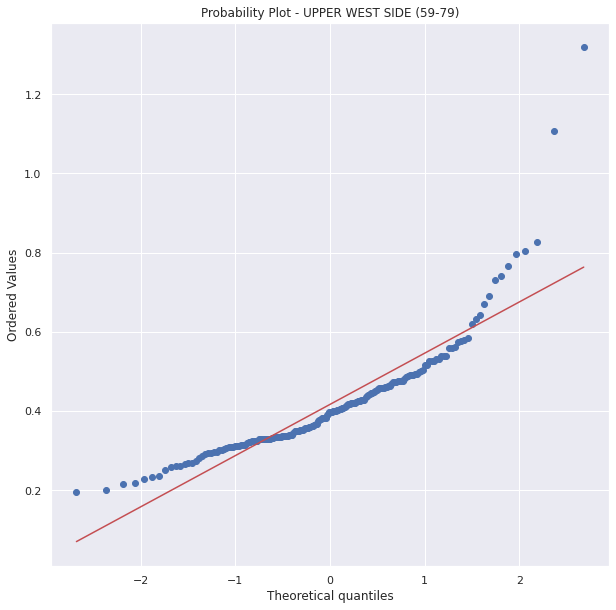

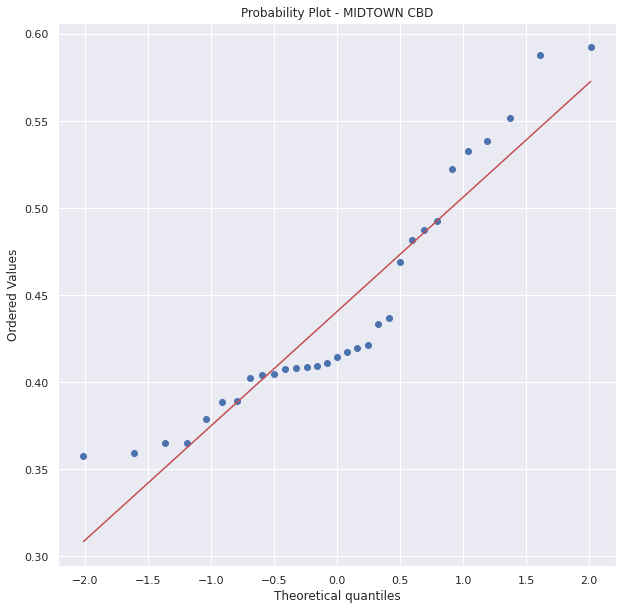

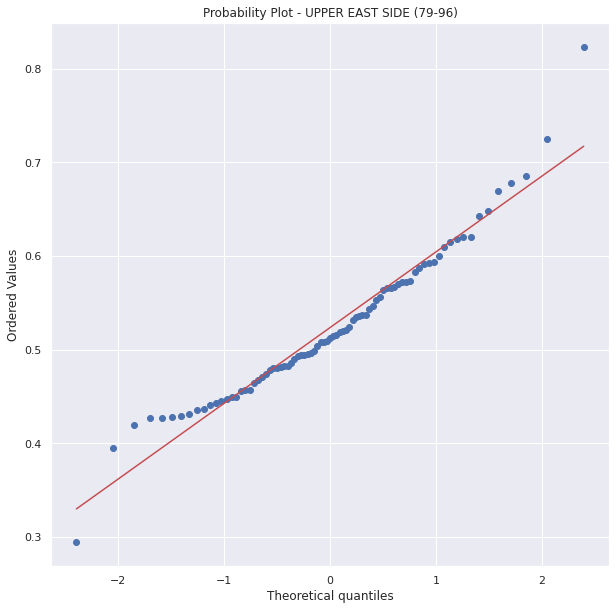

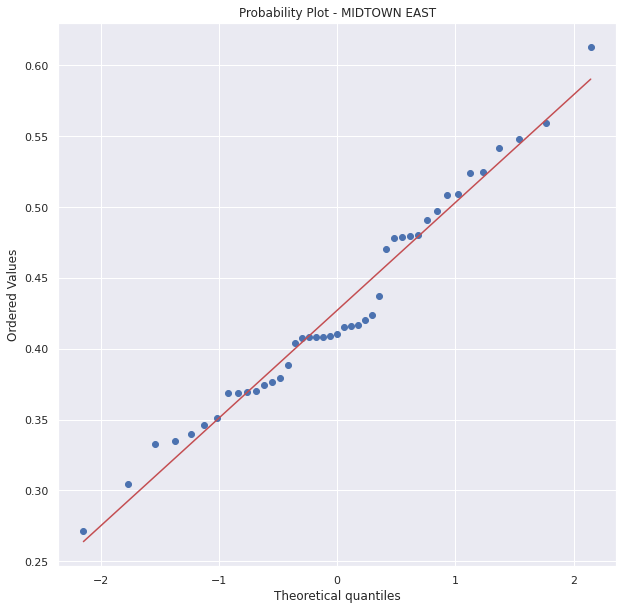

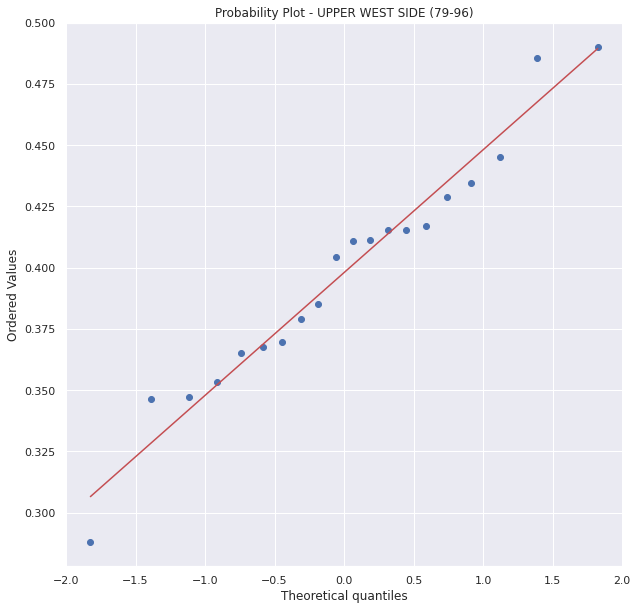

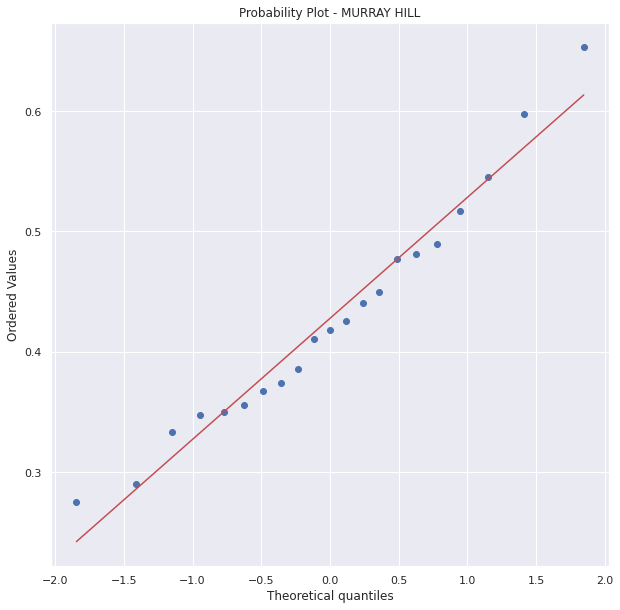

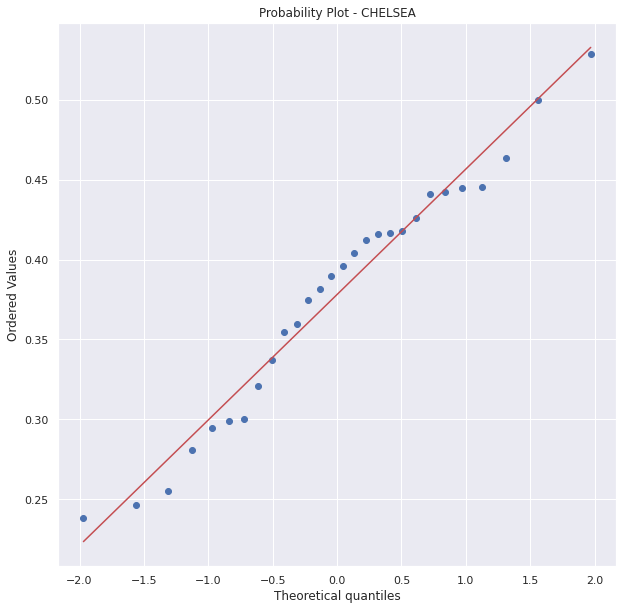

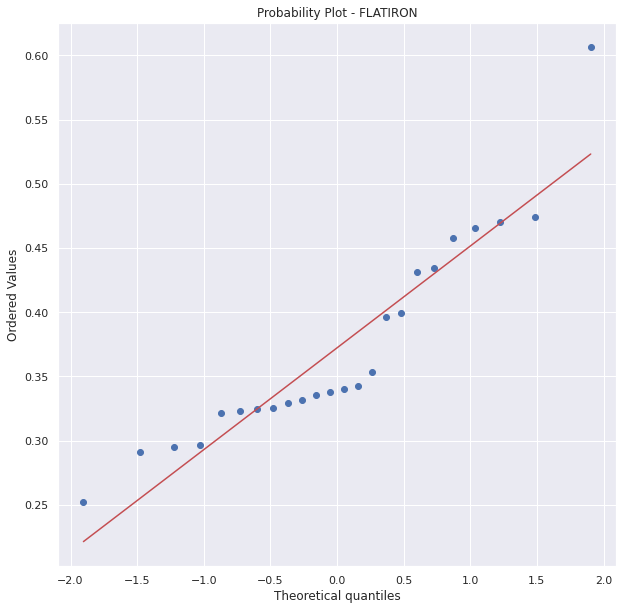

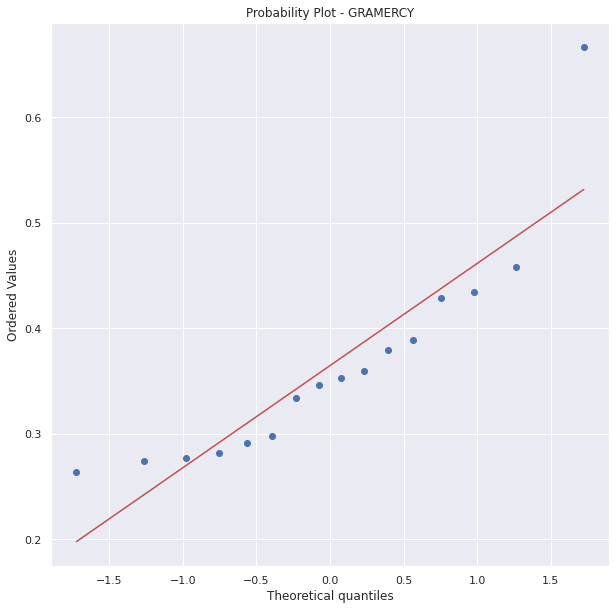

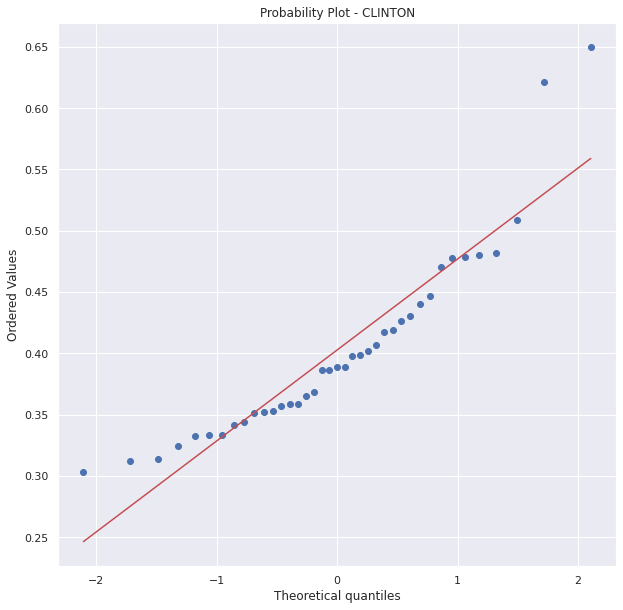

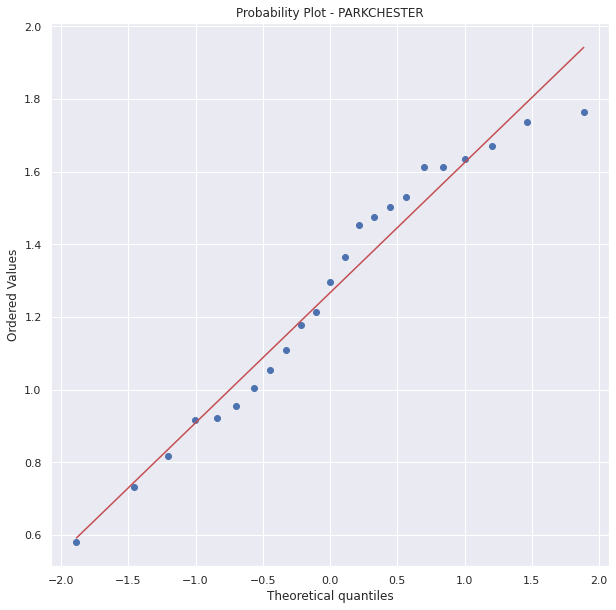

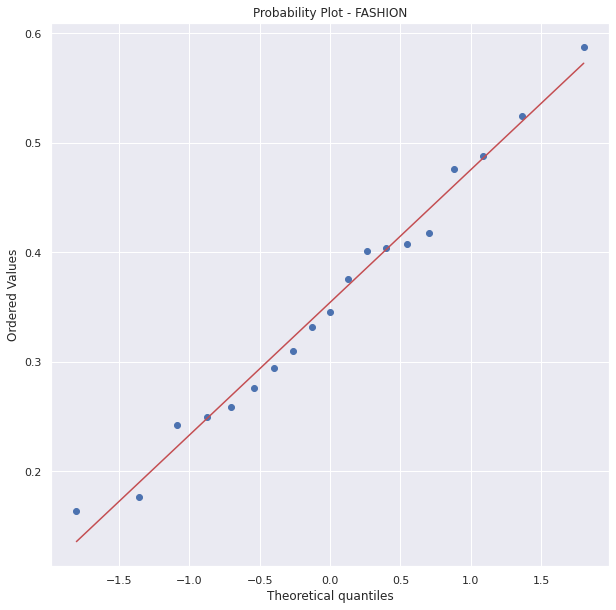

In [14]:
from scipy import stats

for n in neighborhood:
    stats.probplot(df[df['Neighborhood'] == n]['Efficiency'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  n)
    plt.show()

Because our dataset is so vast. In order to get the best results out of the Machine Learning Algorithms, we provided the dataset with a minimal amount of training data to get the most accurate model. Below we will be using Optimization in order to get the best HyperParamters in order to test the model. We also changed the neighborhood names to numbers so that the model is able to understand and organize the areas. 


# Model Analysis

In [15]:
df['Neighborhood'], uniques = pd.factorize(df['Neighborhood'])
df.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Efficiency,rank
11,1-00016-7508,200 RECTOR PLACE,0,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012,0.350767,0
714,1-01049-7501,1 CENTRAL PARK,1,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012,0.360613,0
85,1-00142-7502,200 CHAMBERS STREET,0,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012,0.396666,0
673,1-00936-7501,333 EAST 30 STREET,2,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012,0.555874,2
27,1-00027-7502,20 EXCHANGE PLACE,3,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012,0.356205,0


In [16]:
rfinput = df[['Total Units', 'Gross SqFt', 'Estimated Gross Income', 'Estimated Expense', 'Net Operating Income','Full Market Value', 'Efficiency']]

# generate training/testing data for testing our hyperparameters
X_train, X_test, y_train, y_test = train_test_split( 
              rfinput, df['Neighborhood'], test_size = 0.3, random_state = 0) 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


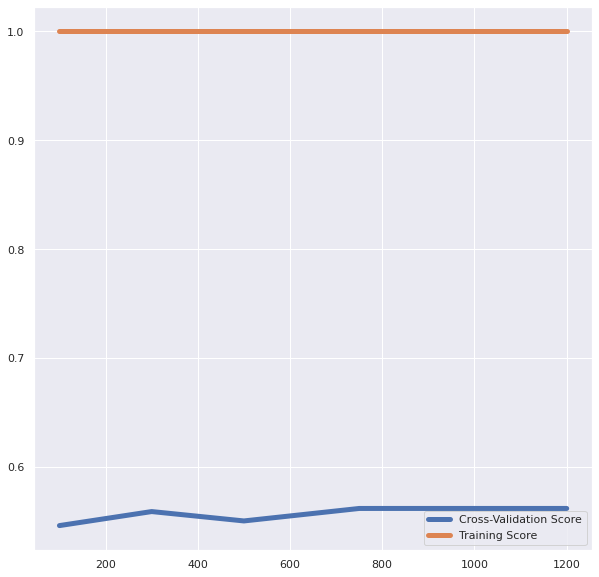

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
import matplotlib.pyplot as plt
import requests

num_est = [100, 300, 500, 750, 800, 1200]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)

plt.figure(figsize=(10,10))
plt.plot(num_est, np.mean(test_scoreNum, axis=1), label='Cross-Validation Score', linewidth=5)
plt.plot(num_est, np.mean(train_scoreNum, axis=1), label='Training Score', linewidth=5)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


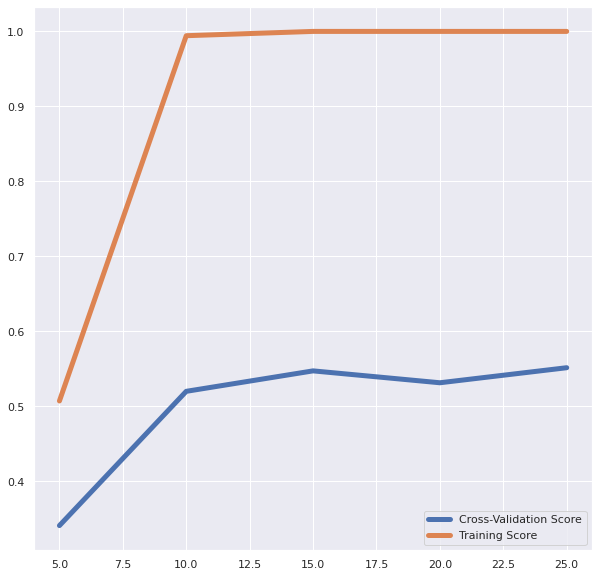

In [18]:
max_depth = [5, 10, 15, 20, 25]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(n_estimators=100),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = max_depth, cv = 3)

plt.figure(figsize=(10,10))
plt.plot(max_depth, np.mean(test_scoreNum, axis=1), label='Cross-Validation Score', linewidth=5)
plt.plot(max_depth, np.mean(train_scoreNum, axis=1), label='Training Score', linewidth=5)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


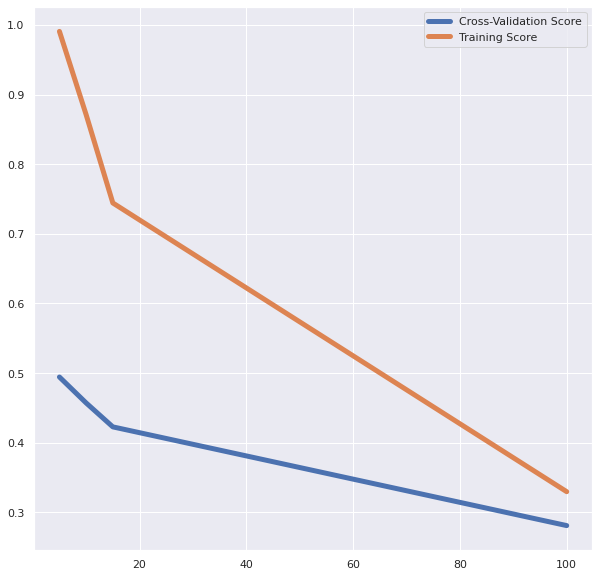

In [19]:
min_samples_split = [1, 5, 10, 15, 100]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(n_estimators=100),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = min_samples_split, cv = 3)

plt.figure(figsize=(10,10))
plt.plot(min_samples_split, np.mean(test_scoreNum, axis=1), label='Cross-Validation Score', linewidth=5)
plt.plot(min_samples_split, np.mean(train_scoreNum, axis=1), label='Training Score', linewidth=5)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


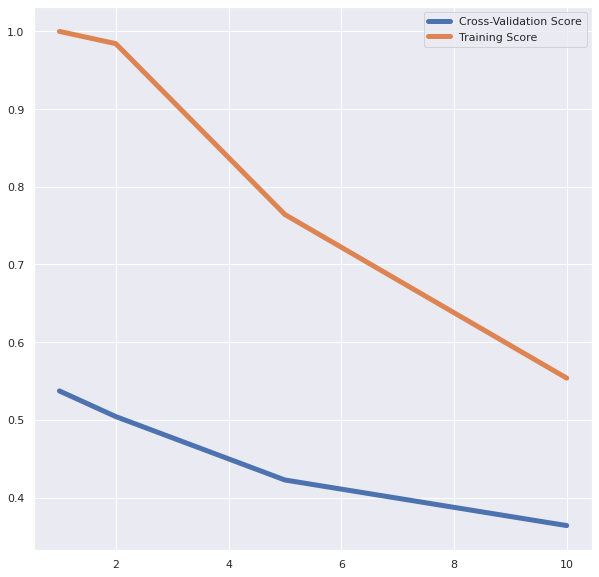

In [20]:
min_samples_leaf = [1, 2, 5, 10] 
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(n_estimators=100),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)

plt.figure(figsize=(10,10))
plt.plot(min_samples_leaf, np.mean(test_scoreNum, axis=1), label='Cross-Validation Score', linewidth=5)
plt.plot(min_samples_leaf, np.mean(train_scoreNum, axis=1), label='Training Score', linewidth=5)
plt.legend()
plt.show()



Based on the results from the optimization we can estimate the parameters for the RandomForestClassifier. 






In [21]:
rfclassifier = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=30, min_samples_leaf=10) 
rfscores = cross_val_score(rfclassifier, rfinput, df['Neighborhood'], cv=5)
rfscores

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.41      , 0.41      , 0.43      , 0.38190955, 0.4120603 ])

The highest accuracy the model receives is 41%. This means that there exists some relationship between different neighborhoods and the cost of living associated with them. I think the model could have been more accurate if there was a balanced amount of homes in each neighborhood or if there was a lot more data, but there is always a chance of it overpowering the model. Also if we could organize the model based on the type of building it is, that could also have an impact on the data. 

In [22]:
import scipy.stats

d = sm.datasets.longley.load()
d.exog = sm.add_constant(d.exog)
results1 = sm.OLS(d.endog, d.exog).fit()


f = np.var(X_test, ddof=1)/np.var(y_pred, ddof=1)
p_val = 1-scipy.stats.f.cdf(f, 425, 425)

print(f)

print(p_val.mean())

Total Units               1.464998e-06
Gross SqFt                1.347173e+00
Estimated Gross Income    3.878307e+02
Estimated Expense         8.032547e+01
Net Operating Income      1.651029e+02
Full Market Value         1.056050e+04
Efficiency                2.462693e-13
dtype: float64
0.28587010419313896


In [25]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


estimator = r.estimators_[5]


# Export as dot file
export_graphviz(estimator, 
                out_file='wine.dot', 
                feature_names = wine.feature_names,
                class_names = wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'wine.dot', '-o', 'wine.png', '-Gdpi=600'])

AttributeError: ignored

In [24]:
df = pd.read_csv('/content/drive/MyDrive/cmsc320final/Condominium_Comparable_Rental_Income_in_NYC.csv')

# remove rows with NaN values
df = df.dropna()

# When Were These Condos Built?

In this part of the project, we will be looking at when and where condominiums were being built in New York City. To prepare ourselves to answer these questions, we dropped rows with missing information. This included dropping rows where the Year Built column had a value of 0. I also added a column of the borough. In the Boro-Block-Lot column, the first number encodes the borough (1=Manhattan, 2=The Bronx, 3=Brooklyn, 4=Queens, 5=Staten Island).

In [26]:
# remove values where year built is 0
df = df[df['Year Built'] != 0]
df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
22068,5-00001-7502,155 BAY STREET,NEW BRIGHTON-ST. GEORGE,R4 -ELEVATOR,57,2005.0,62045,1310390,618589.0,691801,5345009.0,2019
22069,5-04633-7501,3871 AMBOY ROAD,GREAT KILLS,R4 -ELEVATOR,17,2010.0,25139,496747,193570.0,303177,2310003.0,2019
22070,5-00001-7503,90 BAY STREET LANDING,NEW BRIGHTON-ST. GEORGE,R4 -ELEVATOR,101,1900.0,182861,2801431,1486660.0,1314771,9376009.0,2019
22071,5-00487-7501,7 NAVY PIER COURT,TOMPKINSVILLE,RR -CONRENT,467,2014.0,361176,8516530,3564807.0,4951723,39042000.0,2019


In [27]:
df.dtypes['Boro-Block-Lot']

dtype('O')

We see that the Boro-Block-Lot column is of type object. I convert this to a string and then extract the first number that encodes to the borough to make the new column.

In [28]:
boro = []
for index, row in df.iterrows():
  bstr = str(row['Boro-Block-Lot'])
  bint = int(bstr[0])
  if bint == 1:
    boro.append('MANHATTAN')
  elif bint == 2:
    boro.append('THE BRONX')
  elif bint == 3:
    boro.append('BROOKLYN')
  elif bint == 4:
    boro.append('QUEENS')
  else:
    boro.append('STATEN ISLAND')

df['Borough'] = boro

We need to know the earliest and latest condo built in order to make a histogram with the proper amount of bins.

In [29]:
print(df['Year Built'].min(), df['Year Built'].max())

1825.0 2019.0


Below I make a new DataFrame with each condo appearing in the dataframe once. I am doing this because the original dataframe has reports from 2012 to 2019. So if a condo was built before 2012, it will appear in the dataframe 8 times. We only want to account for each condo once. I originally thought to do this by iterrating through df, adding a row to a new df if the Boro-Block-Lot number was not already in the new df. I realized this would be inefficient and I could use the drop_duplicates() function

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe694d69640>]],
      dtype=object)

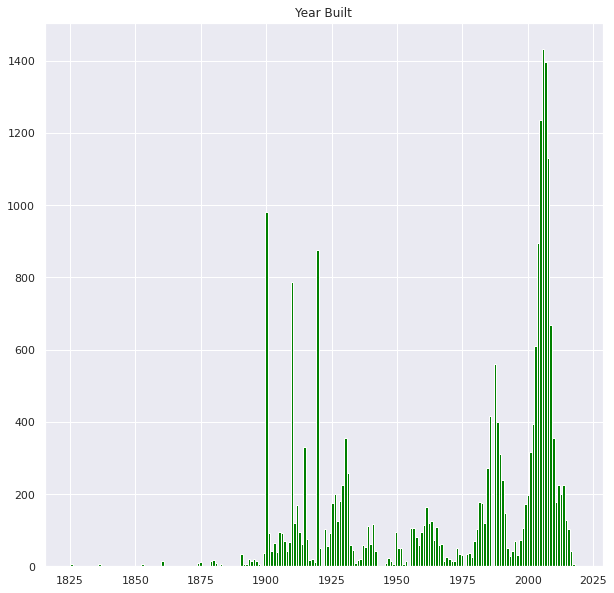

In [30]:
years = df[['Boro-Block-Lot', 'Address','Year Built']].copy()
years.drop_duplicates()
years.hist(column= 'Year Built', bins = 200, color = 'green')

From this histogram, we can see that there was a huge surge in condominiums being built after 2000. Let's take a closer look at specific time periods.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe694db2880>]],
      dtype=object)

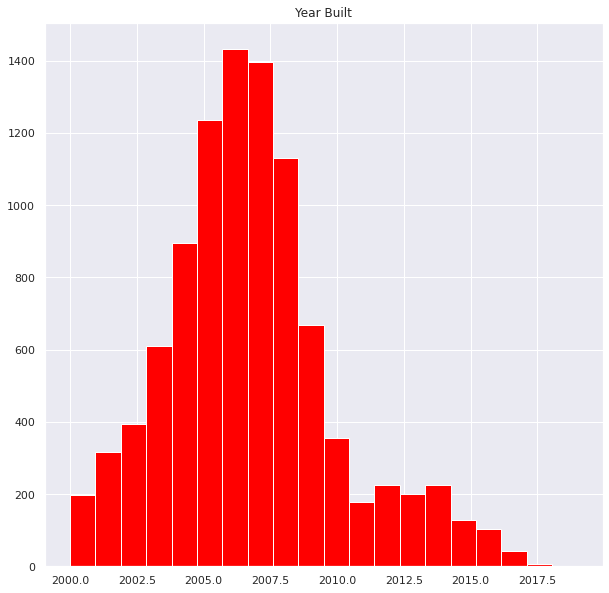

In [31]:
new_century = years[years['Year Built'] >= 2000]
new_century.hist(column= 'Year Built', bins = new_century['Year Built'].unique().size, color = 'red')

Looking at this plot, we can see a huge drop off in condominiums being built after 2008. We had an economic recession in 2008. Our economy was in shambles following this recession and housing prices went way down. So developers were hesitant to build new condos in New York City. Also a lot of people were out of work, so there were definetly difficulties finding human capital to build new condos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe694d50df0>]],
      dtype=object)

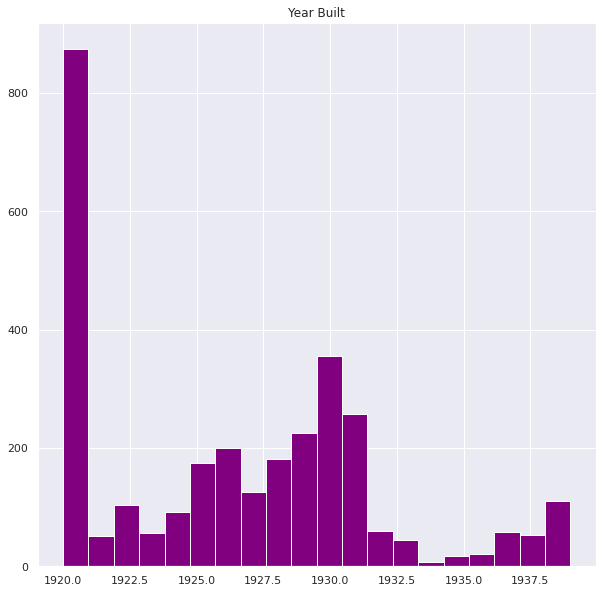

In [32]:
depression = years[years['Year Built'] >= 1920]
depression = depression[depression['Year Built'] <= 1939]
depression.hist(column= 'Year Built', bins = depression['Year Built'].unique().size, color = 'purple')

This plot tells a story of our country and The Great Depression of 1929-1939. Prior to The Great Depression, we had the Roaring 20's, a period of economic boom. We see condos being built and at an increasing rate through the 1920s. Then the stock market crashed in 1929, many people lost their jobs and houses, the country fell into a terrible economic recession. In 1934 the Federal Housing Administration was introduced which can explain the uptick in development at the end of the Depression. These events explain the halt in new condominiums being built after 1931 and then more condominiums were being built after 1934.

# Chi-Square Test: Is Building Classification Dependent on Borough?

Hypothesis Testing: We want to see if there is a difference in the Building Classifications between the different Boroughs. To do this we will run a Chi-Square Test. Our null hypothesis is that building classification and borough are independent. The alternative hypothesis is that a building's classification is dependent on borough.

Here is a contingency table showing the frequencies of each building classification in each borough.

In [33]:
from scipy.stats import chi2_contingency
gency = pd.crosstab(df['Building Classification'], df['Borough'])
gency

Borough,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,THE BRONX
Building Classification,,,,,
R2 -WALK-UP,477,152,230,10,40
R2-CONDOMINIUM,658,231,310,19,62
R2-WALK-UP,723,245,319,18,69
R4 -ELEVATOR,1298,1603,798,58,66
R4-CONDOMINIUM,1278,2969,744,75,104
R4-ELEVATOR,1789,3352,1006,86,103
R9 -CONDOPS,51,291,53,0,17
R9-CONDOMINIUM,56,493,76,0,25
R9-CONDOPS,78,532,96,0,25


This is the same table normalized as percentages.

In [34]:
gency_pct = pd.crosstab(df['Building Classification'], df['Borough'], normalize='index')
gency_pct

Borough,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,THE BRONX
Building Classification,,,,,
R2 -WALK-UP,0.524752,0.167217,0.253025,0.011001,0.044004
R2-CONDOMINIUM,0.514062,0.180469,0.242188,0.014844,0.048438
R2-WALK-UP,0.526201,0.178311,0.232169,0.013100,0.050218
R4 -ELEVATOR,0.339524,0.419304,0.208737,0.015171,0.017264
R4-CONDOMINIUM,0.247195,0.574275,0.143907,0.014507,0.020116
R4-ELEVATOR,0.282355,0.529040,0.158775,0.013573,0.016256
R9 -CONDOPS,0.123786,0.706311,0.128641,0.000000,0.041262
R9-CONDOMINIUM,0.086154,0.758462,0.116923,0.000000,0.038462
R9-CONDOPS,0.106703,0.727770,0.131327,0.000000,0.034200


I made this heatmap to get an idea about how different these frequencies were before running the Chi-Square test.

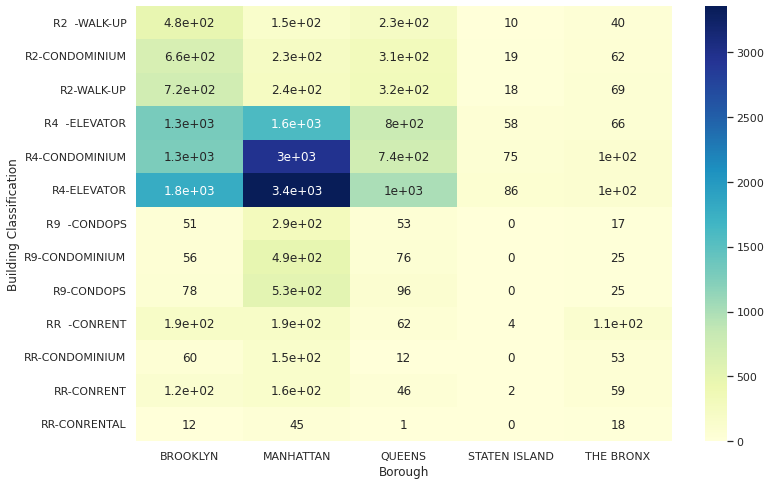

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(gency, annot=True, cmap='YlGnBu')

In [36]:
c, p, dof, expected = chi2_contingency(gency)
print(p)

0.0


Our p-value is below 0.05 so we reject the null hypothesis, meaning there is a dependence between building classification and borough.

# Where Are The Condos Built?

In [37]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders.base import GeocoderTimedOut

geolocator = Nominatim(user_agent="geoapiExercises")

In [38]:
place = "1 COENTIES SLIP, FINANCIAL DISTRICT, MANHATTAN, CITY OF NEW YORK, NEW YORK"
location = geolocator.geocode(place)
print(location.latitude)
data = location.raw
print(location, data)

40.703548
1, Coenties Slip, Financial District, Manhattan, New York County, City of New York, New York, 10004, United States {'place_id': 308252414, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 5671326, 'boundingbox': ['40.703498', '40.703598', '-74.010674', '-74.010574'], 'lat': '40.703548', 'lon': '-74.010624', 'display_name': '1, Coenties Slip, Financial District, Manhattan, New York County, City of New York, New York, 10004, United States', 'class': 'place', 'type': 'house', 'importance': 0.06000000000000005}


In [39]:
temp = df.loc[0:10].copy()
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in temp.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
    data = location.raw
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    lats.append(data['lat'])
    longs.append(data['lon'])


temp['Lat'] = lats
temp['Lon'] = longs
temp

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough,Lat,Lon
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,MANHATTAN,40.703548,-74.010624
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,MANHATTAN,40.7027759,-74.012773
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,MANHATTAN,39.1536479,-111.817677
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,MANHATTAN,40.70983015,-74.01791350733029
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012,MANHATTAN,41.02637625,-92.41190449999999
6,1-00016-7503,250 SOUTH END AVENUE,TRIBECA,R4-CONDOMINIUM,109,1985.0,105000,4471950,1131900.0,3340050,19435362.0,2012,MANHATTAN,40.709646899999996,-74.01625042482377
7,1-00016-7504,300 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,107,1986.0,87479,3668869,1041875.0,2626994,19833999.0,2012,MANHATTAN,40.7099286,-74.01677637343651
8,1-00016-7505,380 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,247,1987.0,255845,9801422,2499606.0,7301816,55129007.0,2012,MANHATTAN,40.70907625,-74.01818482315421
9,1-00016-7506,280 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,121,1985.0,106129,4451050,1263996.0,3187054,24062007.0,2012,MANHATTAN,40.7088551,-74.0166594
10,1-00016-7507,300 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,154,1986.0,126008,5284776,1500755.0,3784021,28569001.0,2012,MANHATTAN,40.7088046,-74.01744829470954


Above is me toying with the geopy library. I put in the address from the first column of df and I was able to convert this into data about that location. Using the geocode, we are able to get a dictionary with location data about the address, we can extract the latitude and longitude for each condo and add it to the df.

In [40]:
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in years.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

years['Lat'] = lats
years['Lon'] = longs

AttributeError: ignored

For whatever reason, when I tried to fetch the latitude and longitude for every single condo in the dataframe, I reached an error in my code. "AttributeError: 'NoneType' object has no attribute 'raw'" was the error message the above code block terminated with. These are cases where geopy was not able to find a location for the given address. I also handled timeout exceptions by making the latitude and longitude for these condos (0, 0). Later I will filter the locations that timed-out from my data. I still want to do some map analysis so I will take the coordinates for condos with specific attributes.

In [41]:
nine_tn = df[df['Report Year'] == 2019]
top_valued = nine_tn.sort_values(by='Full Market Value', ascending=False)
top_valued = top_valued[:100]

from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in top_valued.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

top_valued['Lat'] = lats
top_valued['Lon'] = longs

top_valued

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough,Lat,Lon
20124,1-01090-7502,605 WEST 42 STREET,CLINTON,RR -CONRENT,1174,2008.0,991724,57886930,16135349.0,41751581,339084999.0,2019,MANHATTAN,26.261543,-98.3485431
20121,1-00607-7503,133 WEST 11 STREET,GREENWICH VILLAGE-WEST,R4 -ELEVATOR,199,2013.0,681903,39420812,8305579.0,31115233,252702013.0,2019,MANHATTAN,39.1952,-94.6849757
20125,1-01171-7510,21 WEST END AVENUE,UPPER WEST SIDE (59-79),RR -CONRENT,616,2013.0,683518,39083559,9193317.0,29890242,242754000.0,2019,MANHATTAN,51.57955725,-0.0019892440213608153
20203,2-03944-7501,9 METROPOLITAN OVAL,PARKCHESTER,R4 -ELEVATOR,3857,1955.0,3801490,62914660,30183831.0,32730829,238573877.0,2019,THE BRONX,40.83945595,-73.85969934835572
19606,1-01115-7501,25 CENTRAL PARK WEST,UPPER WEST SIDE (59-79),R4 -ELEVATOR,423,1932.0,598316,34588648,5630154.0,28958494,235185988.0,2019,MANHATTAN,40.7704241,-73.98123314817387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19348,1-01113-7501,30 WEST 61 STREET,UPPER WEST SIDE (59-79),R4 -ELEVATOR,165,1982.0,202235,12202860,3753482.0,8449378,68622004.0,2019,MANHATTAN,0,0
19998,1-01373-7504,405 MAIN STREET,ROOSEVELT ISLAND,RR -CONRENT,242,2007.0,237122,12254465,3815293.0,8439172,68539000.0,2019,MANHATTAN,0,0
19753,1-01400-7501,181 EAST 65 STREET,UPPER EAST SIDE (59-79),R4 -ELEVATOR,93,2000.0,180846,11006288,2575247.0,8431041,68472999.0,2019,MANHATTAN,33.753786,-113.566855
19904,1-00915-7501,225 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,191,2007.0,222784,12072665,3744999.0,8327666,67633015.0,2019,MANHATTAN,39.064622840455485,-94.5828768372411


In [42]:
top_valued['Lat'] = pd.to_numeric(top_valued['Lat'])
top_valued['Lon'] = pd.to_numeric(top_valued['Lon'])

I want to analyze where the top valued condos are located for the report year 2019.

From a glance at the new dataframe top_valued, we can see that geopy wasn't able to fetch coordinates for some of these addresses and it provided worng coordinates for others. So we put restrictions on the latitude and longitude to make sure all of our points were in New York City. From the 100 top valued condos in 2019, we have 33 data points.

In [43]:
temp = top_valued[top_valued['Lon'] < -73.42]
temp = temp[temp['Lon'] > -74.3]
temp = temp[temp['Lat'] > 40.4]
temp = temp[temp['Lat'] < 40.95]
temp['Lat'].size

33

In [44]:
import folium
import requests
top_locs = temp.copy()
boro_map = folium.Map(location=[temp['Lat'].mean(), temp['Lon'].mean()], zoom_start=11)

In [45]:
for index, row in top_locs.iterrows():
  if row['Borough'] == 'MANHATTAN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='red')).add_to(boro_map)
  elif row['Borough'] == 'THE BRONX':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='blue')).add_to(boro_map)
  elif row['Borough'] == 'QUEENS':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='green')).add_to(boro_map)
  elif row['Borough'] == 'BROOKLYN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='orange')).add_to(boro_map)
  else:
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='purple')).add_to(boro_map)

boro_map

This map displays the locations of 34 of the top valued condos in New York City for the report year 2019. From the map we can see that a large number of these condos are in Manhattan. We also notice that the condos that aren't in Manhattan are located very close to Manhattan. It seems that property in Manhattan holds a higher value as well as property close to Manhattan. Staten Island has none of the high valued condos for 2019. This follows our assertion about the property value being inflated in Manhattan. Staten Island is separated from Manhattan by the bay. The other boroughs that have high valued condos have much easier access to Manhattan. We can call the three points in The Bronx and exception to the assertion we made about condos in and around Manhattan. These condos are not near Manhattan, yet they hold high value.

In [46]:
fift = df[df['Year Built'] >= 2015]
fift = fift[fift['Report Year'] == 2019]
fift

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Borough
20002,1-00352-7501,115 DELANCEY STREET,LOWER EAST SIDE,RR -CONRENT,53,2016.0,88827,2143396,535627.0,1607769,12725000.0,2019,MANHATTAN
20095,2-03027-7501,4215 PARK AVENUE,BATHGATE,RR -CONRENT,256,2016.0,313553,5230064,2354783.0,2875281,21023000.0,2019,THE BRONX
20120,1-00346-7501,145 CLINTON STREET,LOWER EAST SIDE,RR -CONRENT,152,2015.0,156074,7454094,1507675.0,5946419,48294000.0,2019,MANHATTAN
20122,1-00878-7501,130 EAST 23 STREET,GRAMERCY,R4 -ELEVATOR,145,2017.0,267815,17780238,5334875.0,12445363,101082005.0,2019,MANHATTAN
20127,1-01911-7502,155 WEST 126 STREET,HARLEM-CENTRAL,R2 -WALK-UP,12,2015.0,13325,433329,80350.0,352979,2866998.0,2019,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22029,4-12603-7501,118-35 FARMERS BOULEVARD,ST. ALBANS,RR -CONRENT,66,2016.0,87958,1991369,703664.0,1287705,10081000.0,2019,QUEENS
22030,4-01223-7504,67-19 ROOSEVELT AVENUE,75TH Q QUEENS,R4 -ELEVATOR,9,2016.0,10719,217917,65386.0,152531,1169997.0,2019,QUEENS
22031,4-00415-7504,41-04 27 STREET,LONG ISLAND CITY,R4 -ELEVATOR,32,2015.0,27553,810609,275530.0,535079,4344998.0,2019,QUEENS
22032,4-00382-7501,31-12 38 AVENUE,LONG ISLAND CITY,R4 -ELEVATOR,18,2017.0,19528,696368,222814.0,473554,3846001.0,2019,QUEENS


In [47]:
from geopy.geocoders.base import GeocoderTimedOut
lats = []
longs = []
for index, row in fift.iterrows():
  place = row['Address']
  try:
    location = geolocator.geocode(place)
  except GeocoderTimedOut as e:
    lats.append(0)
    longs.append(0)
  else:
    data = location.raw
    lats.append(data['lat'])
    longs.append(data['lon'])

fift['Lat'] = lats
fift['Lon'] = longs

In [48]:
fift['Lat'] = pd.to_numeric(fift['Lat'])
fift['Lon'] = pd.to_numeric(fift['Lon'])
temp = fift[fift['Lon'] < -73.42]
temp = temp[temp['Lon'] > -74.3]
temp = temp[temp['Lat'] > 40.4]
temp = temp[temp['Lat'] < 40.95]
fift_locs = temp.copy()
fift_locs['Lat'].size

95

From the 193 condos built in 2015 or after, geopy was able to give the coordinates for 95.

In [49]:
fift_map = folium.Map(location=[temp['Lat'].mean(), temp['Lon'].mean()], zoom_start=11)

In [50]:
for index, row in fift_locs.iterrows():
  if row['Borough'] == 'MANHATTAN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='red')).add_to(fift_map)
  elif row['Borough'] == 'THE BRONX':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='blue')).add_to(fift_map)
  elif row['Borough'] == 'QUEENS':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='green')).add_to(fift_map)
  elif row['Borough'] == 'BROOKLYN':
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='orange')).add_to(fift_map)
  else:
    folium.Marker(location=[row["Lat"], row["Lon"]], icon=folium.Icon(color='purple')).add_to(fift_map)

fift_map

This map displays the locations of condominiums that were built in 2015 or later with the color distinguishing the borough of the condo at that location. Red is manhattan, Orange is Brooklyn, Green is Queens, Blue is The Bronx, and Purple is Staten Island. The first thing that can be noticed on this map, is that some of the markers are placed in a different borough than what the Borough column says. This happens because geopy is fetching the wrong location for these points. We will discount these from our analysis of this map. From the map we can see that there are no condos being built in Staten Island. We can see that most of the new condos built are in Brooklyn. Queens and The Bronx have also developed a lot of new condos since 2015. In Manhattan, not many new condominiums are being built, the few that have been established in these recent years are built close to each other.

In [51]:
df.groupby(['Borough'])['Year Built'].mean()

Borough
BROOKLYN         1985.907484
MANHATTAN        1955.362911
QUEENS           1986.811084
STATEN ISLAND    1978.536765
THE BRONX        1990.666667
Name: Year Built, dtype: float64

These results support our assertions about the map. We see that Brooklyn, Queens, and The Bronx have newer condos than Staten Island and Manhattan.

In [ ]:
%%shell
jupyter nbconvert --to html /content/finalproject.ipynb